In [133]:
import os
from os import path
from wordcloud import WordCloud
from bs4 import BeautifulSoup
import requests
from newspaper import Article
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
from GoogleNews import GoogleNews

We want to create a Word Cloud based on a number of articles to aggregate/summarize information and allow the user a quick picture into daily news without scrolling through dozens of articles.

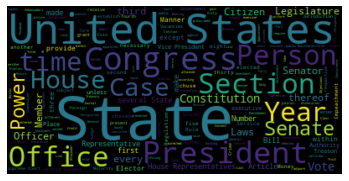

In [4]:
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

text = open(path.join(d, 'constitution.txt')).read()

wordcloud = WordCloud(min_word_length=4).generate(text)

import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


We have to first webscrape articles to do this.

In [11]:
articleReqested = requests.get("https://www.cnn.com/2021/03/27/politics/kamala-harris-vice-presidents-residence/index.html")
articleContent = articleReqested.content

In [12]:
articleSoup = BeautifulSoup(articleContent, 'html5lib')

In [21]:
coverpage_news = articleSoup.find_all('h1')
extracted_news = list()
for i in coverpage_news:
    extracted_news.append( i.get_text() )
print(extracted_news)

["After two months in office, Kamala Harris is still living out of suitcases -- and she's getting frustrated with it"]


In [84]:
articleReqested = Article("https://www.cnn.com/2021/03/27/politics/kamala-harris-vice-presidents-residence/index.html", language="en")
articleReqested.download()
articleReqested.parse()
print(articleReqested.title)
print(articleReqested.text)

After two months in office, Kamala Harris is still living out of suitcases -- and she's getting frustrated with it
(CNN) It has been more than two months since Kamala Harris was sworn in as vice president of the United States, a historic moment for the country , as Harris is the first woman and the first woman of color to hold the second highest office in the land. Yet, Harris -- along with her husband, Georgetown Law professor Douglas Emhoff -- is still, ostensibly, living out of suitcases, unable to move into the private residence reserved for the vice president because it's still undergoing renovations.

It's unclear why the renovations are taking so long, said one administration official, but it's a situation that has left Harris increasingly and understandably bothered, according to several people who spoke to CNN about her situation. "She is getting frustrated," said another administration official, noting with each passing day the desire to move in to her designated house -- a s

In [74]:
print(articleReqested.keywords)

[]


In [88]:
def convert(lst):
    wordList = lst.split()
    for i, j in enumerate( wordList ):
        wordList[i] = j.lower()
    return wordList

# def convert(lst):
#     wordList = lst.split()
#     for i, j in enumerate( wordList ):
#         wordList[i] = j.lower()
#     wordUnique = list( set(wordList) )
# #     print(wordUnique)
#     def countKey(x):
#         return wordList.count(x)
#     wordUnique.sort(reverse = True, key = countKey)
# #     print(wordUnique)
#     return wordList

In [89]:
articleWords = convert(articleReqested.text) 
print(articleWords)

['(cnn)', 'it', 'has', 'been', 'more', 'than', 'two', 'months', 'since', 'kamala', 'harris', 'was', 'sworn', 'in', 'as', 'vice', 'president', 'of', 'the', 'united', 'states,', 'a', 'historic', 'moment', 'for', 'the', 'country', ',', 'as', 'harris', 'is', 'the', 'first', 'woman', 'and', 'the', 'first', 'woman', 'of', 'color', 'to', 'hold', 'the', 'second', 'highest', 'office', 'in', 'the', 'land.', 'yet,', 'harris', '--', 'along', 'with', 'her', 'husband,', 'georgetown', 'law', 'professor', 'douglas', 'emhoff', '--', 'is', 'still,', 'ostensibly,', 'living', 'out', 'of', 'suitcases,', 'unable', 'to', 'move', 'into', 'the', 'private', 'residence', 'reserved', 'for', 'the', 'vice', 'president', 'because', "it's", 'still', 'undergoing', 'renovations.', "it's", 'unclear', 'why', 'the', 'renovations', 'are', 'taking', 'so', 'long,', 'said', 'one', 'administration', 'official,', 'but', "it's", 'a', 'situation', 'that', 'has', 'left', 'harris', 'increasingly', 'and', 'understandably', 'bothered

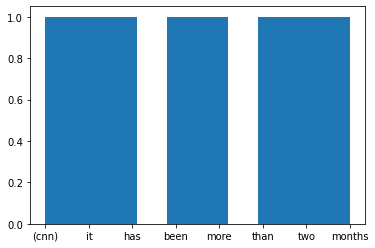

In [72]:
plt.hist(articleWords[:8]) 
plt.show()

<h1> Doing Multiple Links </h1>

In [111]:
links = ['https://www.cnn.com/2021/03/27/politics/kamala-harris-vice-presidents-residence/index.html', 
         ]


In [112]:
def convert(lst):
    wordList = lst.split()
    for i, j in enumerate( wordList ):
        wordList[i] = j.lower()
    return wordList


In [113]:
articleWords = list() # aggregated words

for article in links:
    articleReqested = Article(article, language="en")
    articleReqested.download()
    articleReqested.parse()
    articleWords.append( convert(articleReqested.text) )

In [114]:
print(len(articleWords))

1


In [115]:
with open('politicsArticles.txt', 'w') as f:
    for article in articleWords:
        for word in article:
            f.write("%s" % word)
            f.write(" ")

In [ ]:
def getWordForCategory(topic, links):
    articleWords = list() # aggregated words
    for article in links:
        articleReqested = Article(article, language="en")
        articleReqested.download()
        articleReqested.parse()
        articleWords.append( convert(articleReqested.text) )
        fileName = topic + ".txt"
        with open(fileName, 'w') as f:
        for article in articleWords:
            for word in article:
                f.write("%s" % word)
                f.write(" ")

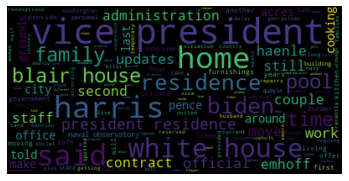

In [116]:
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

text = open(path.join(d, 'politicsArticles.txt')).read()

wordcloud = WordCloud(min_word_length=4).generate(text)

import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [130]:


def makeCloud(topic):
    def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
        return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

    d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

    #get user's topic choice from frontend
    #get user's image mask choice from frontend
    #get user's color preference (black/white or color)

    user_topic = topic + ".txt"
    user_mask = 'wolfstencil.jpg'
    color_choice = None #or grey_color_func
    text = open(path.join(d, user_topic)).read()

    cloud_mask = np.array(Image.open(path.join(d, user_mask)))
    wordcloud = WordCloud(mask=cloud_mask, contour_width=3, contour_color='white', max_words=100, min_word_length=4).generate(text)
    #wordcloud.to_file(path.join(d, "pigconstitution.png"))

    plt.imshow(wordcloud.recolor(color_func=None), interpolation='bilinear')
    plt.axis("off")
    plt.show()


In [168]:
def getWordForCategory(topic, links):
    articleWords = list() # aggregated words
    for article in links:
        try:
            articleReqested = Article(article, language="en")
            articleReqested.download()
            articleReqested.parse()
            articleWords.append( convert(articleReqested.text) )
            fileName = topic + ".txt"
            with open(fileName, 'w') as f:
                for article in articleWords:
                    for word in article:
                        f.write("%s" % word)
                        f.write(" ")
        except:
            print("Couldn't Read File")

In [127]:
links = ['https://www.ign.com/articles/monster-hunter-rise-april-2021-free-update-adds-apex-rathalos-and-chameleos',
        'https://www.gamesradar.com/life-is-strange-true-colors-interview-future-games-show/']
getWordForCategory("Gaming", links)

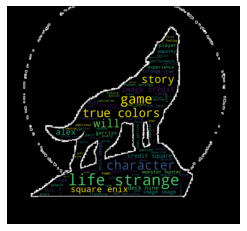

In [131]:
makeCloud('Gaming')

In [127]:
links = ['https://www.ign.com/articles/monster-hunter-rise-april-2021-free-update-adds-apex-rathalos-and-chameleos',
        'https://www.gamesradar.com/life-is-strange-true-colors-interview-future-games-show/']
getWordForCategory("Gaming", links)

<h2>getWordForCategory(Topic, Links) to make a file with the text</h2>
<h3>makeCloud for testing and making the cloud </h3>

In [171]:
def googleLinks(topic):
    googlenews = GoogleNews()
    googlenews.set_lang('en')
    googlenews.set_period('1d')
    googlenews.set_encode('utf-8')
    article =  googlenews.get_news(topic)
    links = googlenews.get_links()[:5]
    actualLinks = list()
    for l in links:
        l = "http://" + l
        print(l)
        actualLinks.append( requests.get(l).url ) 
    return actualLinks
    

http://news.google.com/./articles/CAIiEOafPlxsmJhFodeikLq_sT0qGQgEKhAIACoHCAow4paRCzCm36UDMIWqtwY?hl=en-US&gl=US&ceid=US%3Aen
http://news.google.com/./articles/CAIiEMEs7npQlQA-NeoqCNmR7P4qMwgEKioIACIQ7SNyo2_kBOaP4H9koW3jwSoUCAoiEO0jcqNv5ATmj-B_ZKFt48EwqtfLBg?hl=en-US&gl=US&ceid=US%3Aen
http://news.google.com/./articles/CAIiEPrezBzGY6ojxpceiG4HwF4qMwgEKioIACIQgsKss-496Vc-o9N0T7UPHyoUCAoiEILCrLPuPelXPqPTdE-1Dx8wjb_HBg?hl=en-US&gl=US&ceid=US%3Aen
http://news.google.com/./articles/CBMibmh0dHBzOi8vZWR0ZWNobm9sb2d5LmNvLnVrL2NvbW1lbnRzL2RvZXMtZ2FtaW5nLWhhdmUtYS1wbGFjZS1pbi1kaWdpdGFsLWxlYXJuaW5nLWFzLWEtdmlhYmxlLWVkdWNhdGlvbmFsLXRvb2wv0gEA?hl=en-US&gl=US&ceid=US%3Aen
http://news.google.com/./articles/CAIiELIok4t7TSbNP8leMk1CdNcqEwgEKgwIACoFCAow4GowoAgwkRo?hl=en-US&gl=US&ceid=US%3Aen
['https://gamerant.com/pc-gaming-classic-games-preservation/', 'https://www.tomsguide.com/news/gaming-on-macs-is-still-a-wasteland-heres-how-apple-should-evolve', 'https://www.autoblog.com/2021/03/27/rocket-league-s

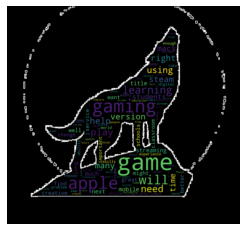

In [172]:
links = googleLinks("Gaming")
print(links)
getWordForCategory('Gaming', links)
makeCloud("Gaming")

http://news.google.com/./articles/CBMihwFodHRwczovL3d3dy5jb3JzaWNhbmFkYWlseXN1bi5jb20vbmV3cy9tYWluLXN0cmVldC1ob3N0cy1zcHJpbmctZmFzaGlvbi1zaG93LWRvd250b3duL2FydGljbGVfNGJiZTY1MGEtOGU2YS0xMWViLTgxYzUtODM5YmJiN2VmOWYxLmh0bWzSAQA?hl=en-US&gl=US&ceid=US%3Aen
http://news.google.com/./articles/CBMiV2h0dHBzOi8vd3d3LmNwci5vcmcvMjAyMS8wMy8yNy9kZW52ZXItYXJ0LW11c2V1bS1wYXJpcy10by1ob2xseXdvb2QtZmFzaGlvbi1leGhpYml0aW9uL9IBAA?hl=en-US&gl=US&ceid=US%3Aen
http://news.google.com/./articles/CAIiEFmTV0kznI2q7QiTAkPPy1YqFQgEKg0IACoGCAowrqkBMKBFMLGBAg?hl=en-US&gl=US&ceid=US%3Aen
http://news.google.com/./articles/CAIiENGSeikyzEfyD3dYtv6mY5AqGAgEKg8IACoHCAow6KLyCTDY8XIwpKbsBQ?hl=en-US&gl=US&ceid=US%3Aen
http://news.google.com/./articles/CBMiigFodHRwczovL3d3dy53aGlvLmNvbS9uZXdzL2xvY2FsL2dyYW5kLW9wZW5pbmctbG9jYWwtZmFzaGlvbi1idXNpbmVzcy10YWtlLXBsYWNlLXNhdHVyZGF5LWFmdGVybm9vbi1kYXl0b24tbWFsbC9QUFNMNU01SExKQjczQ0xVUUVESVNWQ0w2WS_SAZkBaHR0cHM6Ly93d3cud2hpby5jb20vbmV3cy9sb2NhbC9ncmFuZC1vcGVuaW5nLWxvY2FsLWZhc2hpb24tY

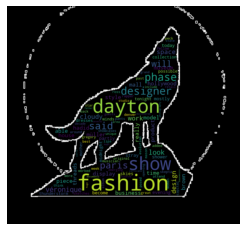

In [174]:
links = googleLinks("Fashion")
print(links)
getWordForCategory('Fashion', links)
makeCloud("Fashion")

http://news.google.com/./articles/CBMi3AFodHRwczovL3d3dy5rY2VudHYuY29tL2FydGljbGUvbmV3cy9wb2xpdGljcy9pbnNpZGUtcG9saXRpY3MvdGV4YXMtcG9saXRpY3MvaW5zaWRlLXRleGFzLXBvbGl0aWNzLXRleGFzLWNvbmdyZXNzbWFuLWRlc2NyaWJlcy1zY2VuZS1pbnNpZGUtY2VudGVyLWZvci1taWdyYW50LWtpZHMtYXMtaGVhcnRicmVha2luZy8yODctMDk0ZWUzY2EtYTE0Yy00ZGUzLTk0OWUtZTQwNTI3MjBlMDMy0gHgAWh0dHBzOi8vd3d3LmtjZW50di5jb20vYW1wL2FydGljbGUvbmV3cy9wb2xpdGljcy9pbnNpZGUtcG9saXRpY3MvdGV4YXMtcG9saXRpY3MvaW5zaWRlLXRleGFzLXBvbGl0aWNzLXRleGFzLWNvbmdyZXNzbWFuLWRlc2NyaWJlcy1zY2VuZS1pbnNpZGUtY2VudGVyLWZvci1taWdyYW50LWtpZHMtYXMtaGVhcnRicmVha2luZy8yODctMDk0ZWUzY2EtYTE0Yy00ZGUzLTk0OWUtZTQwNTI3MjBlMDMy?hl=en-US&gl=US&ceid=US%3Aen
http://news.google.com/./articles/CAIiEC22XXOyhVGBpxfzZohgxt8qGQgEKhAIACoHCAowj7yGCzCmqoQDMNOajAY?hl=en-US&gl=US&ceid=US%3Aen
http://news.google.com/./articles/CBMipAFodHRwczovL3d3dy5ueTEuY29tL255Yy9hbGwtYm9yb3VnaHMvcG9saXRpY3MvMjAyMS8wMy8yNy9ueWMtcG9saWNlLXJlZm9ybS1lbmRpbmctcXVhbGlmaWVkLWltbXVuaXR5LWJpbGwtZGUtYmxhc2lvLXNheXMtb2Zma

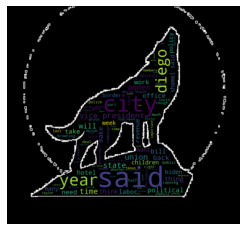

http://news.google.com/./articles/CAIiEOafPlxsmJhFodeikLq_sT0qGQgEKhAIACoHCAow4paRCzCm36UDMIWqtwY?hl=en-US&gl=US&ceid=US%3Aen
http://news.google.com/./articles/CAIiEMEs7npQlQA-NeoqCNmR7P4qMwgEKioIACIQ7SNyo2_kBOaP4H9koW3jwSoUCAoiEO0jcqNv5ATmj-B_ZKFt48EwqtfLBg?hl=en-US&gl=US&ceid=US%3Aen
http://news.google.com/./articles/CAIiEPrezBzGY6ojxpceiG4HwF4qMwgEKioIACIQgsKss-496Vc-o9N0T7UPHyoUCAoiEILCrLPuPelXPqPTdE-1Dx8wjb_HBg?hl=en-US&gl=US&ceid=US%3Aen
http://news.google.com/./articles/CBMibmh0dHBzOi8vZWR0ZWNobm9sb2d5LmNvLnVrL2NvbW1lbnRzL2RvZXMtZ2FtaW5nLWhhdmUtYS1wbGFjZS1pbi1kaWdpdGFsLWxlYXJuaW5nLWFzLWEtdmlhYmxlLWVkdWNhdGlvbmFsLXRvb2wv0gEA?hl=en-US&gl=US&ceid=US%3Aen
http://news.google.com/./articles/CAIiELIok4t7TSbNP8leMk1CdNcqEwgEKgwIACoFCAow4GowoAgwkRo?hl=en-US&gl=US&ceid=US%3Aen
['https://gamerant.com/pc-gaming-classic-games-preservation/', 'https://www.tomsguide.com/news/gaming-on-macs-is-still-a-wasteland-heres-how-apple-should-evolve', 'https://www.autoblog.com/2021/03/27/rocket-league-s

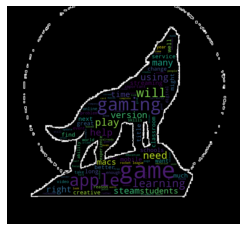

http://news.google.com/./articles/CAIiEKGbZm4vEhom5mqJUaROarwqFggEKg4IACoGCAowl6p7MN-zCTDlkko?hl=en-US&gl=US&ceid=US%3Aen
http://news.google.com/./articles/CBMihwFodHRwczovL3d3dy5jb3JzaWNhbmFkYWlseXN1bi5jb20vbmV3cy9tYWluLXN0cmVldC1ob3N0cy1zcHJpbmctZmFzaGlvbi1zaG93LWRvd250b3duL2FydGljbGVfNGJiZTY1MGEtOGU2YS0xMWViLTgxYzUtODM5YmJiN2VmOWYxLmh0bWzSAQA?hl=en-US&gl=US&ceid=US%3Aen
http://news.google.com/./articles/CBMiWWh0dHBzOi8vb3VyY3VsdHVyZW1hZy5jb20vMjAyMS8wMy8yNy9yaXRvLWF1dHVtbi13aW50ZXItMjEtYXQtcmFrdXRlbi1mYXNoaW9uLXdlZWstdG9reW8v0gEA?hl=en-US&gl=US&ceid=US%3Aen
http://news.google.com/./articles/CBMiV2h0dHBzOi8vd3d3LmNwci5vcmcvMjAyMS8wMy8yNy9kZW52ZXItYXJ0LW11c2V1bS1wYXJpcy10by1ob2xseXdvb2QtZmFzaGlvbi1leGhpYml0aW9uL9IBAA?hl=en-US&gl=US&ceid=US%3Aen
http://news.google.com/./articles/CAIiEFmTV0kznI2q7QiTAkPPy1YqFQgEKg0IACoGCAowrqkBMKBFMLGBAg?hl=en-US&gl=US&ceid=US%3Aen
['https://www.theguardian.com/fashion/2021/mar/27/forget-fast-fashion-here-are-the-six-key-trends-you-need-for-2021', 'http

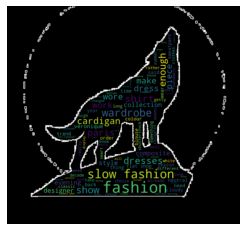

http://news.google.com/./articles/CBMieGh0dHA6Ly93d3cuYnJhZGZvcmRlcmEuY29tL3Nwb3J0cy9idWZmYWxvLXR2LXNwb3J0cy1sb3Nlcy1pY29uLWluLWF6YXIvYXJ0aWNsZV9kNThhODg3YS0yNzgwLTVlM2QtOGNjZi0yODAyMDdmY2EyNGUuaHRtbNIBAA?hl=en-US&gl=US&ceid=US%3Aen
http://news.google.com/./articles/CBMiYGh0dHBzOi8vd3d3LnB1cmR1ZWV4cG9uZW50Lm9yZy9zcG9ydHMvbmF0aW9uYWwvYXJ0aWNsZV9kMWM5ZTZhYi03ZjYyLTU5OTgtYTE5OC03OTExMzUzYzhkNzcuaHRtbNIBAA?hl=en-US&gl=US&ceid=US%3Aen
http://news.google.com/./articles/CAIiEJ5xOvbPdoEMIVNcaFTCV1kqGQgEKhAIACoHCAowwL2ICzCckocDMMaPqQY?hl=en-US&gl=US&ceid=US%3Aen
http://news.google.com/./articles/CBMimQFodHRwczovL3d3dy5rYWRuLmNvbS9jb250ZW50L25ld3MvVGVubmVzc2VlLWdvdmVybm9yLXNpZ25zLXRyYW5zZ2VuZGVyLXNwb3J0cy1iaWxsLWludG8tbGF3LXJlcXVpcmluZy1zdHVkZW50cy10by1wcm92ZS10aGVpci1zZXgtYXQtYmlydGgtNTc0MDgxMDIxLmh0bWzSATVodHRwOi8vd3d3LmthZG4uY29tL3RlbXBsYXRlcy9BTVA_Y29udGVudElEPTU3NDA4MTAyMQ?hl=en-US&gl=US&ceid=US%3Aen
http://news.google.com/./articles/CBMihAFodHRwczovL2J1ZmZhbG9uZXdzLmNvbS9zcG9ydHMvY2FsbHMtZ

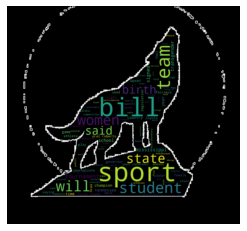

http://news.google.com/./articles/CBMibWh0dHBzOi8vd3d3LnNjaWVudGlmaWNhbWVyaWNhbi5jb20vYXJ0aWNsZS9kYXRhLWFuZC10ZWNobm9sb2d5LWNhbi1oZWxwLXVzLW1ha2UtcHJvZ3Jlc3Mtb24tY292aWQtaW5lcXVpdGllcy_SAQA?hl=en-US&gl=US&ceid=US%3Aen
http://news.google.com/./articles/CAIiEBpbO9krmnDs7vP2vmKrEbYqFQgEKg0IACoGCAowrqkBMKBFMJGBAg?hl=en-US&gl=US&ceid=US%3Aen
http://news.google.com/./articles/CAIiED8UxElGlsI2wUqHT4WkDXIqGQgEKhAIACoHCAowvIaCCzDnxf4CMN2F8gU?hl=en-US&gl=US&ceid=US%3Aen
http://news.google.com/./articles/CAIiEE9cYa95jigxsbHCPSa-_6oqFggEKg4IACoGCAow3O8nMMqOBjD38Ak?hl=en-US&gl=US&ceid=US%3Aen
http://news.google.com/./articles/CBMiQWh0dHBzOi8vYWJjN2NoaWNhZ28uY29tL2lsbGlub2lzLWNvdmlkLWNhc2VzLXZhY2NpbmUtaWwvMTA0NTI3MjEv0gFFaHR0cHM6Ly9hYmM3Y2hpY2Fnby5jb20vYW1wL2lsbGlub2lzLWNvdmlkLWNhc2VzLXZhY2NpbmUtaWwvMTA0NTI3MjEv?hl=en-US&gl=US&ceid=US%3Aen
['https://www.scientificamerican.com/article/data-and-technology-can-help-us-make-progress-on-covid-inequities/', 'https://www.forbes.com/sites/tommybeer/2021/03/

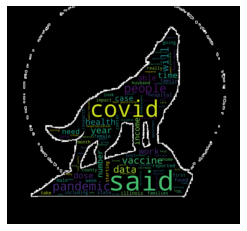

http://news.google.com/./articles/CBMiYGh0dHBzOi8vd3d3LnRoZWd1YXJkaWFuLmNvbS91cy1uZXdzLzIwMjEvbWFyLzI3L3NlYXR0bGUtdGVjaC1pbmR1c3RyeS1jb3ZpZC1jb3JvbmF2aXJ1cy1yZXNwb25zZdIBYGh0dHBzOi8vYW1wLnRoZWd1YXJkaWFuLmNvbS91cy1uZXdzLzIwMjEvbWFyLzI3L3NlYXR0bGUtdGVjaC1pbmR1c3RyeS1jb3ZpZC1jb3JvbmF2aXJ1cy1yZXNwb25zZQ?hl=en-US&gl=US&ceid=US%3Aen
http://news.google.com/./articles/CAIiEIJp44YLLvMQfmaTPvWlPIUqGAgEKg8IACoHCAow1tzJATDnyxUw_cfPBg?hl=en-US&gl=US&ceid=US%3Aen
http://news.google.com/./articles/CBMiN2h0dHBzOi8vamF4ZW50ZXIuY29tL3dvbWVuLWluLXRlY2gtd2llbmNpcnotMTcyNjMwLmh0bWzSAQA?hl=en-US&gl=US&ceid=US%3Aen
http://news.google.com/./articles/CBMiUmh0dHBzOi8vc2FudGFuc3VuLmNvbS8yMDIxLzAzLzI3L2ludGVscy0yMGItaW52ZXN0bWVudC1icmluZ2luZy10aG91c2FuZHMtb2Ytam9icy_SAQA?hl=en-US&gl=US&ceid=US%3Aen
http://news.google.com/./articles/CBMiT2h0dHBzOi8vd3d3Lm5hc2RhcS5jb20vYXJ0aWNsZXMvMy1jaGVhcC10ZWNoLXN0b2Nrcy10by1idXktcmlnaHQtbm93LTIwMjEtMDMtMjfSAQA?hl=en-US&gl=US&ceid=US%3Aen


In [ ]:
listOfTopics = ['politics', 'gaming', 'fashion', 'sports', 'covid', 'tech', 'stocks', 'AAPI', 'BLM', 'health']

for t in listOfTopics:
    links = googleLinks(t)
    print(links)
    getWordForCategory(t, links)
    makeCloud(t)